In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math 
import statistics
import scipy.stats

from tableone import TableOne

C:\Users\slow\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df_sparcs = pd.read_csv('https://health.data.ny.gov/resource/gnzp-ekau.csv')
df_sparcs.head()

C:\Users\slow\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,health_service_area,hospital_county,operating_certificate_number,facility_id,facility_name,age_group,zip_code_3_digits,gender,race,ethnicity,...,apr_risk_of_mortality,apr_medical_surgical_description,payment_typology_1,payment_typology_2,payment_typology_3,birth_weight,abortion_edit_indicator,emergency_department_indicator,total_charges,total_costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Private Health Insurance,NaN,0,N,N,3913.23,3466.83
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,30 to 49,147,M,White,Not Span/Hispanic,...,Minor,Medical,Self-Pay,NaN,NaN,0,N,Y,3597.10,3746.80
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Federal/State/Local/VA,NaN,0,N,Y,9149.22,8322.10
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Medicaid,NaN,0,N,Y,5880.61,5828.87
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,M,White,Not Span/Hispanic,...,Moderate,Medical,Blue Cross/Blue Shield,NaN,NaN,0,N,Y,7019.76,6604.00


In [68]:
# Check data types, shape, and column names
df_sparcs.dtypes, df_sparcs.shape, df_sparcs.columns

C:\Users\slow\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(health_service_area                     object
 hospital_county                         object
 operating_certificate_number           float64
 facility_id                            float64
 facility_name                           object
 age_group                               object
 zip_code_3_digits                       object
 gender                                  object
 race                                    object
 ethnicity                               object
 length_of_stay                           int64
 type_of_admission                       object
 patient_disposition                     object
 discharge_year                           int64
 ccs_diagnosis_code                       int64
 ccs_diagnosis_description               object
 ccs_procedure_code                       int64
 ccs_procedure_description               object
 apr_drg_code                             int64
 apr_drg_description                     object
 apr_mdc_code                           

In [3]:
###### Clean Data ######

# Clean column names
# df_sparcs.columns = df_sparcs.columns.str.replace('[^A-Za-z0-9]+', '_')
# df_sparcs.columns = df_sparcs.columns.str.lower()

# Columns that are objects are turned to strings
columns = list(df_sparcs)
columns
for x in columns: 
    if df_sparcs[x].dtype == 'O': 
        df_sparcs[x] = df_sparcs[x].astype('string')

# Specified columns are reformatted
fix = ['health_service_area','hospital_county','facility_name','age_group', 'ethnicity', 
      'type_of_admission', 'patient_disposition','ccs_diagnosis_description','ccs_procedure_description', 
      'apr_drg_description','apr_mdc_description','apr_severity_of_illness_description', 
      'apr_risk_of_mortality', 'apr_medical_surgical_description','payment_typology_1', 'payment_typology_2', 
      'payment_typology_3']
for x in fix: 
    df_sparcs[x] = df_sparcs[x].str.replace('[^A-Za-z0-9]+', '_') 
    df_sparcs[x] = df_sparcs[x].str.lower()


C:\Users\slow\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-3-ced283860b07>:21: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sparcs[x] = df_sparcs[x].str.replace('[^A-Za-z0-9]+', '_')


In [8]:
# Average charges by age group and type of admission
table1 = pd.pivot_table(df_sparcs, values = 'total_charges', index = ['age_group'],
                       columns = ['type_of_admission'], aggfunc = np.average)
np.round(table1)

C:\Users\slow\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


type_of_admission,elective,emergency,newborn,urgent
age_group,,,,
0_to_17,7652.0,9646.0,3595.0,9779.0
18_to_29,9799.0,13400.0,NaN,9197.0
30_to_49,9845.0,13352.0,NaN,9020.0
50_to_69,21205.0,21322.0,NaN,14071.0
70_or_older,19659.0,17494.0,NaN,11464.0


C:\Users\slow\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:title={'center':'Plot1'}, ylabel='age_group'>

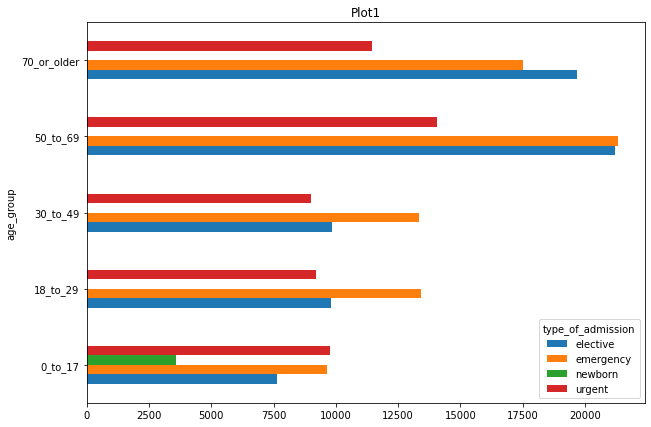

In [9]:
table1.plot.barh(figsize=(10,7),title='Plot 1') 

In [5]:
# Frequency of APR severity of illness by age
table2 = pd.crosstab(df_sparcs['age_group'], df_sparcs['apr_severity_of_illness_description'])
table2

C:\Users\slow\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


apr_severity_of_illness_description,extreme,major,minor,moderate
age_group,,,,
0_to_17,0,3,186,34
18_to_29,2,7,116,44
30_to_49,1,9,75,33
50_to_69,17,64,43,84
70_or_older,16,117,25,124


C:\Users\slow\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


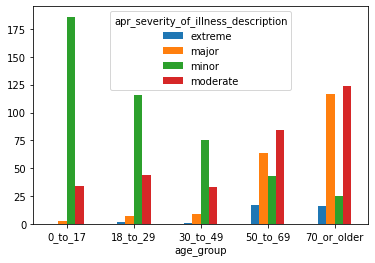

In [6]:
plot2 = table2.plot.bar(rot=0)

In [10]:
# Average length of stay by age group, gender, and type of admission 
table3 = pd.pivot_table(df_sparcs, values = 'length_of_stay', index = ['age_group', 'gender'],
                       columns = ['type_of_admission'], aggfunc = np.average)
np.round(table3)

C:\Users\slow\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


type_of_admission   elective   emergency  newborn    urgent   
age_group   gender                                            
0_to_17     F             2.0        2.0        2.0        NaN
            M             3.0        3.0        2.0        3.0
18_to_29    F             2.0        3.0        NaN        2.0
            M             NaN        2.0        NaN        4.0
30_to_49    F             2.0        3.0        NaN        2.0
            M             2.0        3.0        NaN        2.0
50_to_69    F             6.0        5.0        NaN        6.0
            M             4.0        5.0        NaN        4.0
70_or_older F             5.0        4.0        NaN        4.0
            M             5.0        5.0        NaN        4.0

C:\Users\slow\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:title={'center':'Plot 3'}, ylabel='age_group,gender'>

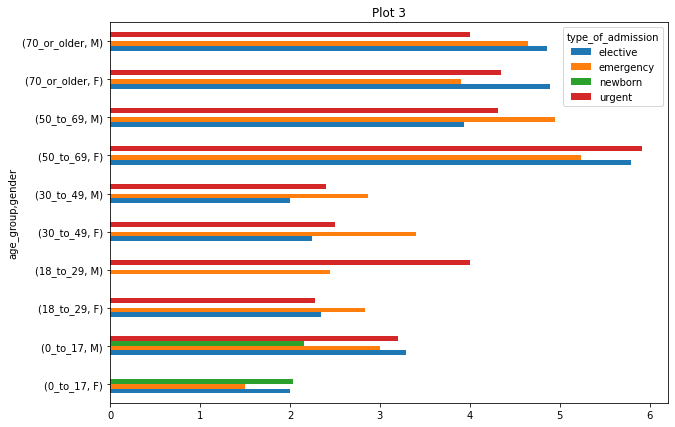

In [11]:
table3.plot.barh(figsize=(10,7),title='Plot 3') 

In [71]:
# Descriptive statistics of length of stay by age group
table4 = df_sparcs.groupby('age_group')['length_of_stay'].describe()
table4

C:\Users\slow\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
0_to_17,223.0,2.174888,1.178217,1.0,1.0,2.0,3.0,12.0
18_to_29,169.0,2.384615,1.139131,1.0,2.0,2.0,3.0,9.0
30_to_49,118.0,2.508475,1.545580,1.0,2.0,2.0,3.0,11.0
50_to_69,208.0,5.052885,4.205137,1.0,3.0,4.0,6.0,27.0
70_or_older,282.0,4.294326,3.065461,1.0,2.0,4.0,6.0,20.0


In [12]:
# Tableone summary statistics
columns = ['age_group','gender','type_of_admission','length_of_stay','total_charges','total_costs']
categorical = ['age_group','gender','type_of_admission']

table5 = TableOne(df_sparcs,columns=columns,categorical=categorical)
table5

C:\Users\slow\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Missing            Overall
n                                                           1000
age_group, n (%)          0_to_17           0         223 (22.3)
                          18_to_29                    169 (16.9)
                          30_to_49                    118 (11.8)
                          50_to_69                    208 (20.8)
                          70_or_older                 282 (28.2)
gender, n (%)             F                 0         621 (62.1)
                          M                           379 (37.9)
type_of_admission, n (%)  elective          0         251 (25.1)
                          emergency                   439 (43.9)
                          newborn                     200 (20.0)
                          urgent                      110 (11.0)
length_of_stay, mean (SD)                   0          3.4 (2.9)
total_charges, mean (SD)                    0  12954.4 (12228.6)
total_costs, mean (SD)                      0  10103.5 (12149.5)